In [131]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### 1. Import Data Csv

In [132]:
df = pd.read_csv("Data/Soal Tugas2.csv")

In [133]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_class
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


##### 2. Insight Menarik

In [134]:
# binning with replace(mengelompokkan agar mudah direpresentasikan/visualisasikan)
df_price = df
df_price["price_class"] = df_price["price_class"].replace(to_replace=0, value="MURAH")
df_price["price_class"] = df_price["price_class"].replace(to_replace=1, value="MAHAL")

1. untuk melihat insight yang menarik kita bisa menggunakan boxplot, dimana boxplot ini diperuntukan untuk menganalisis dua variabel, disini kita menganalisis variabel battery_power,terlihat perbedaan yang signifikan mengenai visualisasi/representasi data dibawah seperti median, nilai minimum dan maximum dari variabel price_class. nilai maximum(diasumsikan berada dikotak bagian atas), nilai median(nilai tengah yaitu digaris tengah),dan nilai minimum(dikotak bagian bawah),serta terlihat kecendrungan yang lebih tinggi berada di price_class mahal,dapat disimpulkan semakin tinggi kotak akan menentukan kelas harga mahal, sehingga bisa disimpulkan bahwa battery_power ini berkorelasi positif atau berbanding lurus terhadap price_class. 

<AxesSubplot:title={'center':'Battery_power (Numerik) & Price_class(Kategorik)'}, xlabel='price_class', ylabel='battery_power'>

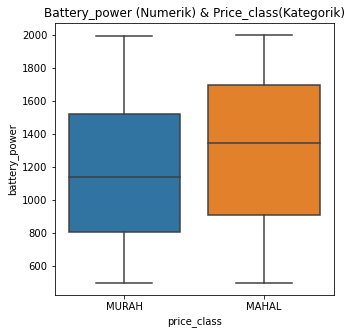

In [135]:
plt.figure(figsize=(5,5))
plt.title("Battery_power (Numerik) & Price_class(Kategorik)")
sns.boxplot(x="price_class",y="battery_power",data=df)

2. Insight menarik kedua menggunakan boxplot, dari hasil outputnya kita dapat menganalisis bahwa Ram memiliki kecendrungan ke price harga mahal, semakin mahal maka ram akan lebih tinggi dan semakin murah cenderung memiliki front camera lebih rendah. jadi, bisa diasumsikan atau disimpulkan bahwa ram ini berbanding lurus atau berkorelasi positif atau berpengaruhi ke price_class mahal.

<AxesSubplot:title={'center':'ram (Numerik) & Price_class(Kategorik)'}, xlabel='price_class', ylabel='ram'>

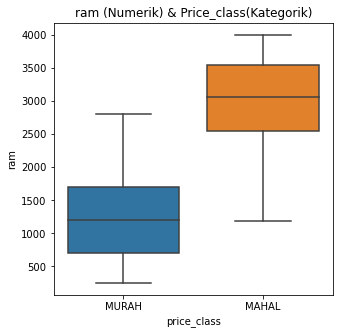

In [136]:
plt.figure(figsize=(5,5))
plt.title("ram (Numerik) & Price_class(Kategorik)")
sns.boxplot(x="price_class",y="ram",data=df)

3. insight ketiga, dari hasil output boxplot dibawah ini kita dapat menganalisis bahwa variabel sc_w(screen width)/lebar layar bertipe numerik vs price_class bertipe kategorik, dengan kecendrungan di price_class yang mahal, sehingga bisa disimpulkan bahwa lebar layar/sc_w berbanding lurus atau berkorelasi positif atau berhubungan. semakin besar nilai numerik dari sc_w akan menghasilkan price_class yang mahal.

<AxesSubplot:title={'center':'sc_w (Numerik) & Price_class(Kategorik)'}, xlabel='price_class', ylabel='sc_w'>

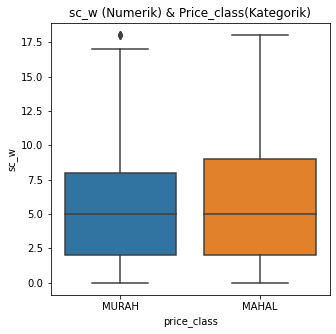

In [137]:
plt.figure(figsize=(5,5))
plt.title("sc_w (Numerik) & Price_class(Kategorik)")
sns.boxplot(x="price_class",y="sc_w",data=df)

4. insight ke-4, dari hasil output boxplot dibawah ini kita dapat menganalisis bahwa variabel touch_screen/layar sentuh bertipe numerik vs price_class bertipe kategorik, dengan kecendrungan yang terlihat sama, sehingga bisa disimpulkan bahwa touch_screen berbanding terbalik atau berkorelasi negatif atau tidak berhubungan. karena semakin besar nilai numerik dari touch_screen tidak mempengaruhi price_class, sehinggu perlu dilakukan reduksi variabel touch_screen agar tidak menjadi noisy data.

<AxesSubplot:title={'center':'touch_screen(Numerik) & Price_class(Kategorik)'}, xlabel='price_class', ylabel='touch_screen'>

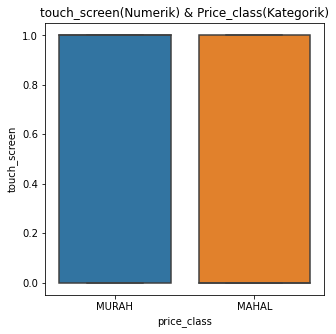

In [138]:
plt.figure(figsize=(5,5))
plt.title("touch_screen(Numerik) & Price_class(Kategorik)")
sns.boxplot(x="price_class",y="touch_screen",data=df)

##### 3. Korelasi Antar Variabel dengan seaborn

In [139]:
# binning ulang
df = df_price
df["price_class"] = df["price_class"].replace(to_replace='MURAH', value=0)
df["price_class"] = df["price_class"].replace(to_replace='MAHAL', value=1)

Penggunaan Heatmap yang digunakan untuk mencari korelasi dan untuk mempermudah dalam menghighlight data agar kita/user dapat fokus untuk melihat data yang berpengaruh saja. nilai yang cenderung semakin gelap menandakan nilai yang berpengaruh besar.biasanya penggunaan heatmap ini hanya bisa menganalisis variabel yang bertipe numerik, sehingga diatas dilakukan binning ulang untuk membentuk nilai data yang bertipe numerik.

korelasi antar variabel, jika variabel menghasilkan nilai yang bernilai positif maka variabel tersebut berkorelasi positif atau berbanding lurus yang artinya variabel tersebut memiliki keterikatan atau hubungan saling berpengaruh. sebaliknya jika variabel itu menghasilkan nilai yang negatif maka variabel tersebut tidak berkorelasi atau berbanding terbalik yang artinya variabel tersebut tidak berhubungan atau cenderung tidak memiliki pengaruh.

output yang dihasilkan menggunakan heatmap ini, contohnya bisa kita analisis berdasarkan price_classnya, ingat semakin gelap maka semakin berpengaruh(berkorelasi positif) dan semakin terang akan sebaliknya(berkorelasi negatif). jika dilihat berdasarkan variabel yang memberikan pengaruh terbesar(bernilai positif) pada price_class/kelas harga bisa terlihat yang bernilai positif yaitu variabel ram, battery_power, px_width, px_height, sc_w, sc_h, n_cores, pc, fc, blue, talk_time, dual_sim, clock_speed, int_memory, three_g, four_g, wifi. artinya atribut" itu berpengaruh terhadap kelas harga.

<AxesSubplot:>

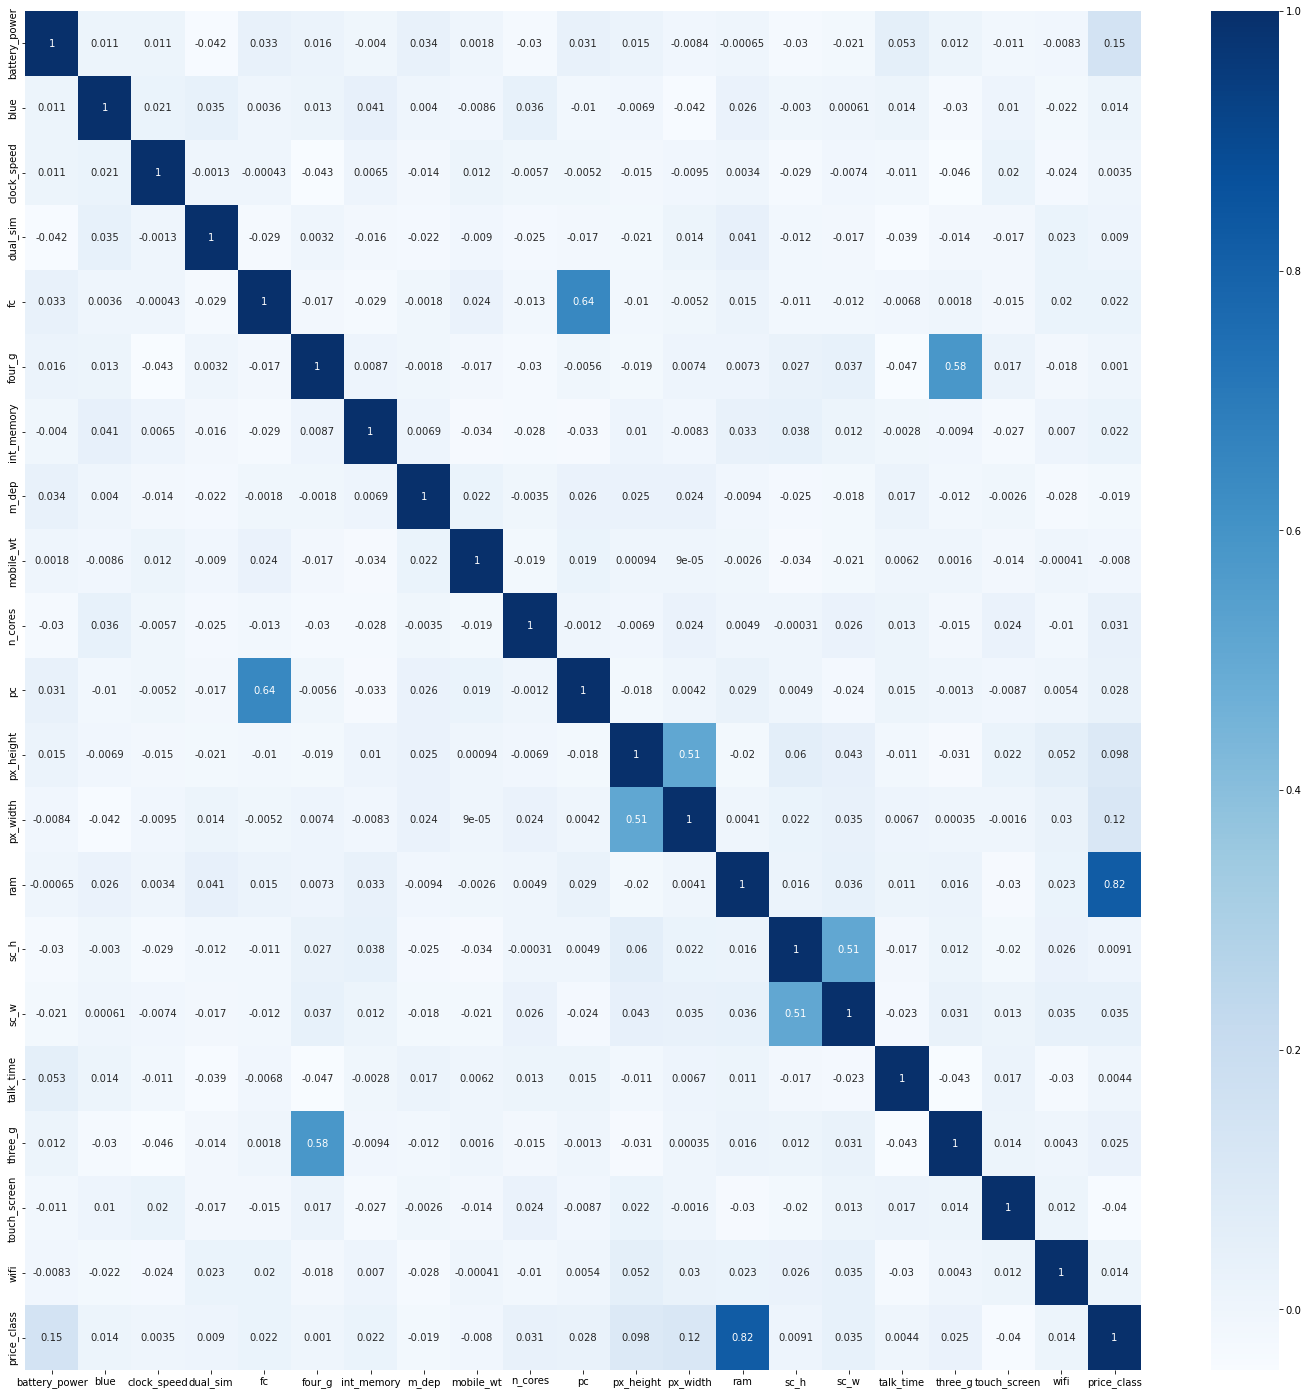

In [140]:
# sns adalah kata ganti atau alias yang berasal dari import seaborn as sns
# heatmap
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

##### 4. Analisis Regresi

analisis regresi adalah teknik analisis hipotesis untuk menguji ada atau tidaknya pengaruh antara variabel satu dengan variabel lain.

contohnya pada output dibawah ini yang mana penggunaan implot untuk menganalisis variabel fc terhadap price_class. dari hasilnya kita bisa menganalisis bahwa front_camera(fc) ini berpengaruh terhadap price_class/kelas harga, karena dilihat dari naiknya diagram implot, artinya fc(front camera) berpengaruh terhadap price_class atau berkorelasi positif/berbanding lurus, yang dimana semakin tinggi value dari fc maka semakin naik juga kelas harganya.

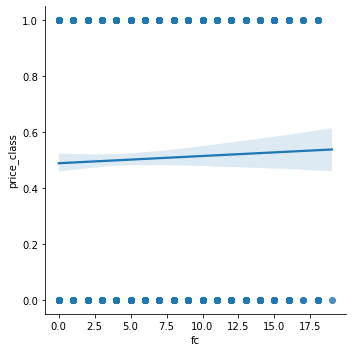

In [141]:
sns.lmplot(x='fc',y="price_class",data=df)

selain penggunaan implot, penggunaan jointplot juga bisa diterapkan untuk menganalisis regresi dan terdistibusi normal atau tidaknya suatu data.

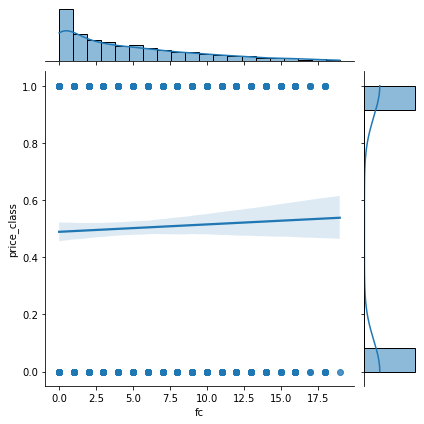

In [142]:
sns.jointplot(x='fc',y="price_class", data=df, kind='reg')

##### 5. Analisis Distribusi Normal

Distribusi Normal adalah yaitu sebuah fungsi distribusi atau penyebaran data pada suatu variabel, fungsi ini dibuktikan dengan sebuah grafik yang disebut curva lonceng. saat distibusi normal/merata ini ditandai dengan kurva akan memuncak dibagian tengah dan melandai dikedua sisinya dengan nilai yang setara.

dalam menentukan distribusi normal kita bisa menggunakan visualisasi data seaborn yaitu distplot/ distribusion plot, yang dimana distribusi ini mirip dengan histogram. menurut saya,hasil output dari distplot pada variabel ram yaitu distribusi normal, karena menghasilkan grafik  puncak atau mean(rata-ratanya) hampir berada ditengah, jadi tidak jomplang ke kiri atau kekanan.

c:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ram', ylabel='Density'>

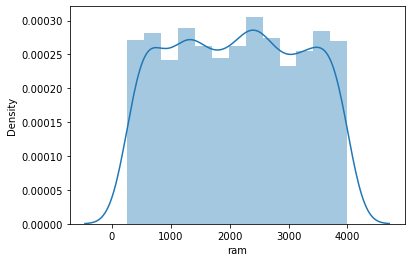

In [143]:
sns.distplot(df.ram)
